In [4]:
import imutils
import numpy as np
from matplotlib import pyplot as plt
import os
from skimage.transform import hough_ellipse
import cv2

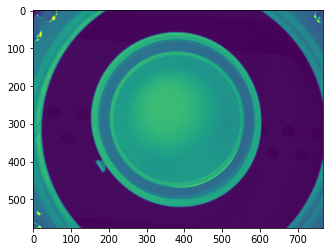

error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-oduouqig\opencv\modules\imgproc\src\drawing.cpp:2501: error: (-215:Assertion failed) npoints > 0 in function 'cv::drawContours'


In [9]:
img = cv2.imread("./images/d_04.bmp",cv2.COLOR_BGR2GRAY)

# img= img[40:550,145:650]

plt.imshow(img)
plt.show()

circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT,1.50,minDist=190,
                                param1=20,param2=40,minRadius=220,maxRadius=250)
# print("center has coordinate ({},{})".format(x_center,y_center))

edges = cv2.Canny(img,100,200)

plt.imshow(edges)
plt.show()


edges = cv2.drawContours(img,edges, contourIdx=0,color=(0,0,0),thickness=cv2.FILLED)
# ellipses = hough_ellipse (edges, accuracy=25, threshold=100, min_size=100, max_size=120)
# print("found {} ellipses".format(len(ellipses)))
# for (accumulator, yc, xc, a, b, orientation) in ellipses:
    # img = cv2.ellipse(img,center=(xc,yc),axes=(a,b))

if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    return circles